In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('customer_curn.csv')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


Replaceing 11 blank spaces with 0 as tenure is 0 and no total changes are recorded   

In [3]:
(df["TotalCharges"] == " ").sum()

np.int64(11)

In [4]:
df["TotalCharges"] = df["TotalCharges"].replace(" ","0")   
df["TotalCharges"] = df["TotalCharges"].astype('float') 

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [6]:
df.isnull().sum().sum()

np.int64(0)

In [7]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692,2279.734304
std,0.368612,24.559481,30.090047,2266.794470
min,0.000000,0.000000,18.250000,0.000000
25%,0.000000,9.000000,35.500000,398.550000
50%,0.000000,29.000000,70.350000,1394.550000
75%,0.000000,55.000000,89.850000,3786.600000
max,1.000000,72.000000,118.750000,8684.800000


In [8]:
df["customerID"].duplicated().sum()

np.int64(0)

 I replce 0 and 1 with yes or no in SeniorCitizen column. i done this data set for data analysis .
 if you want to train any model with this data then 0 and 1 is the best i can replace it with 

In [9]:
def conv(x):
    if x == 1: 
        return "yes"
    else:
        return "no"
df["SeniorCitizen"] = df["SeniorCitizen"].apply(conv)

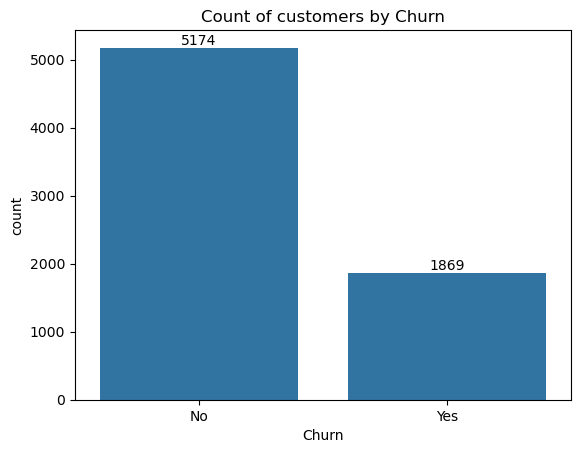

In [10]:
ax = sns.countplot(x = "Churn", data = df)
ax.bar_label(ax.containers[0])
plt.title("Count of customers by Churn")
plt.show()

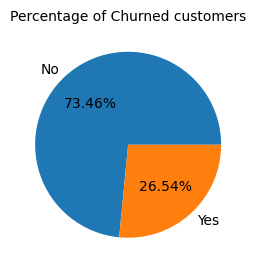

In [11]:
plt.figure(figsize = (3,4))
gb = df.groupby('Churn').agg({'Churn' : 'count'})
plt.pie(gb['Churn'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of Churned customers", fontsize = 10)
plt.show()


From given pie chart we can conclued that 26.54% of our customers are churned out. 
now let's explore the reason behind it

Text(0.5, 1.0, 'Churn by gender')

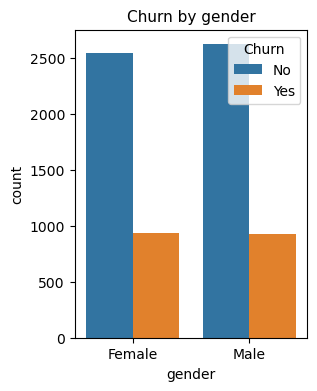

In [12]:
plt.figure(figsize = (3,4))
sns.countplot(x = "gender", data = df, hue = "Churn")
plt.title("Churn by gender" , fontsize = 11)



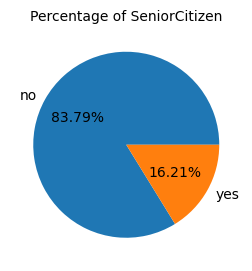

In [13]:
plt.figure(figsize = (3,4))
gb = df.groupby('SeniorCitizen').agg({'SeniorCitizen' : 'count'})
plt.pie(gb['SeniorCitizen'], labels = gb.index, autopct = "%1.2f%%")
plt.title("Percentage of SeniorCitizen", fontsize = 10)
plt.show()

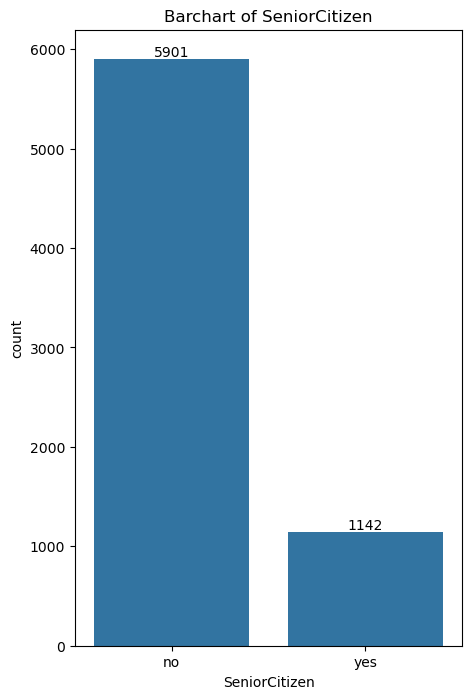

In [14]:
plt.figure(figsize=(5,8))
sc = sns.countplot(x="SeniorCitizen", data=df)
sc.bar_label(sc.containers[0])
plt.title("Barchart of SeniorCitizen")
plt.show()

a lot of SeniorCitizen has churned 

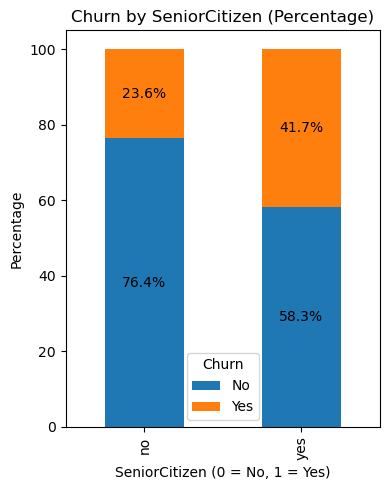

In [15]:
count_df = df.groupby(["SeniorCitizen", "Churn"]).size().unstack()
percent_df = count_df.div(count_df.sum(axis=1), axis=0) * 100
import matplotlib.pyplot as plt

ax = percent_df.plot(
    kind="bar",
    stacked=True,
    figsize=(4, 5)
)

# Add percentage labels
for container in ax.containers:
    ax.bar_label(
        container,
        fmt="%.1f%%",
        label_type="center"
    )

plt.title("Churn by SeniorCitizen (Percentage)")
plt.ylabel("Percentage")
plt.xlabel("SeniorCitizen (0 = No, 1 = Yes)")
plt.legend(title="Churn")
plt.tight_layout()
plt.show()


A greater precentage of SeniorCitizen
has churned.



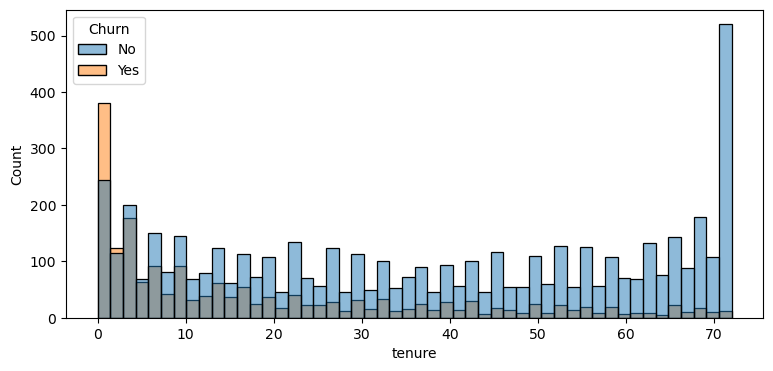

In [16]:
plt.figure(figsize=(9,4))
sns.histplot(x = "tenure", data=df, bins = 50 , hue = "Churn")
plt.show()

people who have stayed long with our services are stayed and those who started on the first month have churned

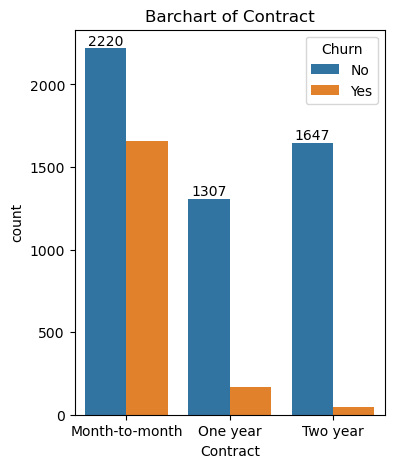

In [17]:
plt.figure(figsize=(4,5))
sc = sns.countplot(x="Contract", data=df,hue = "Churn")
sc.bar_label(sc.containers[0])
plt.title("Barchart of Contract")
plt.show()

Pepole who have yearly contract has stayed longer compared to monthly contract

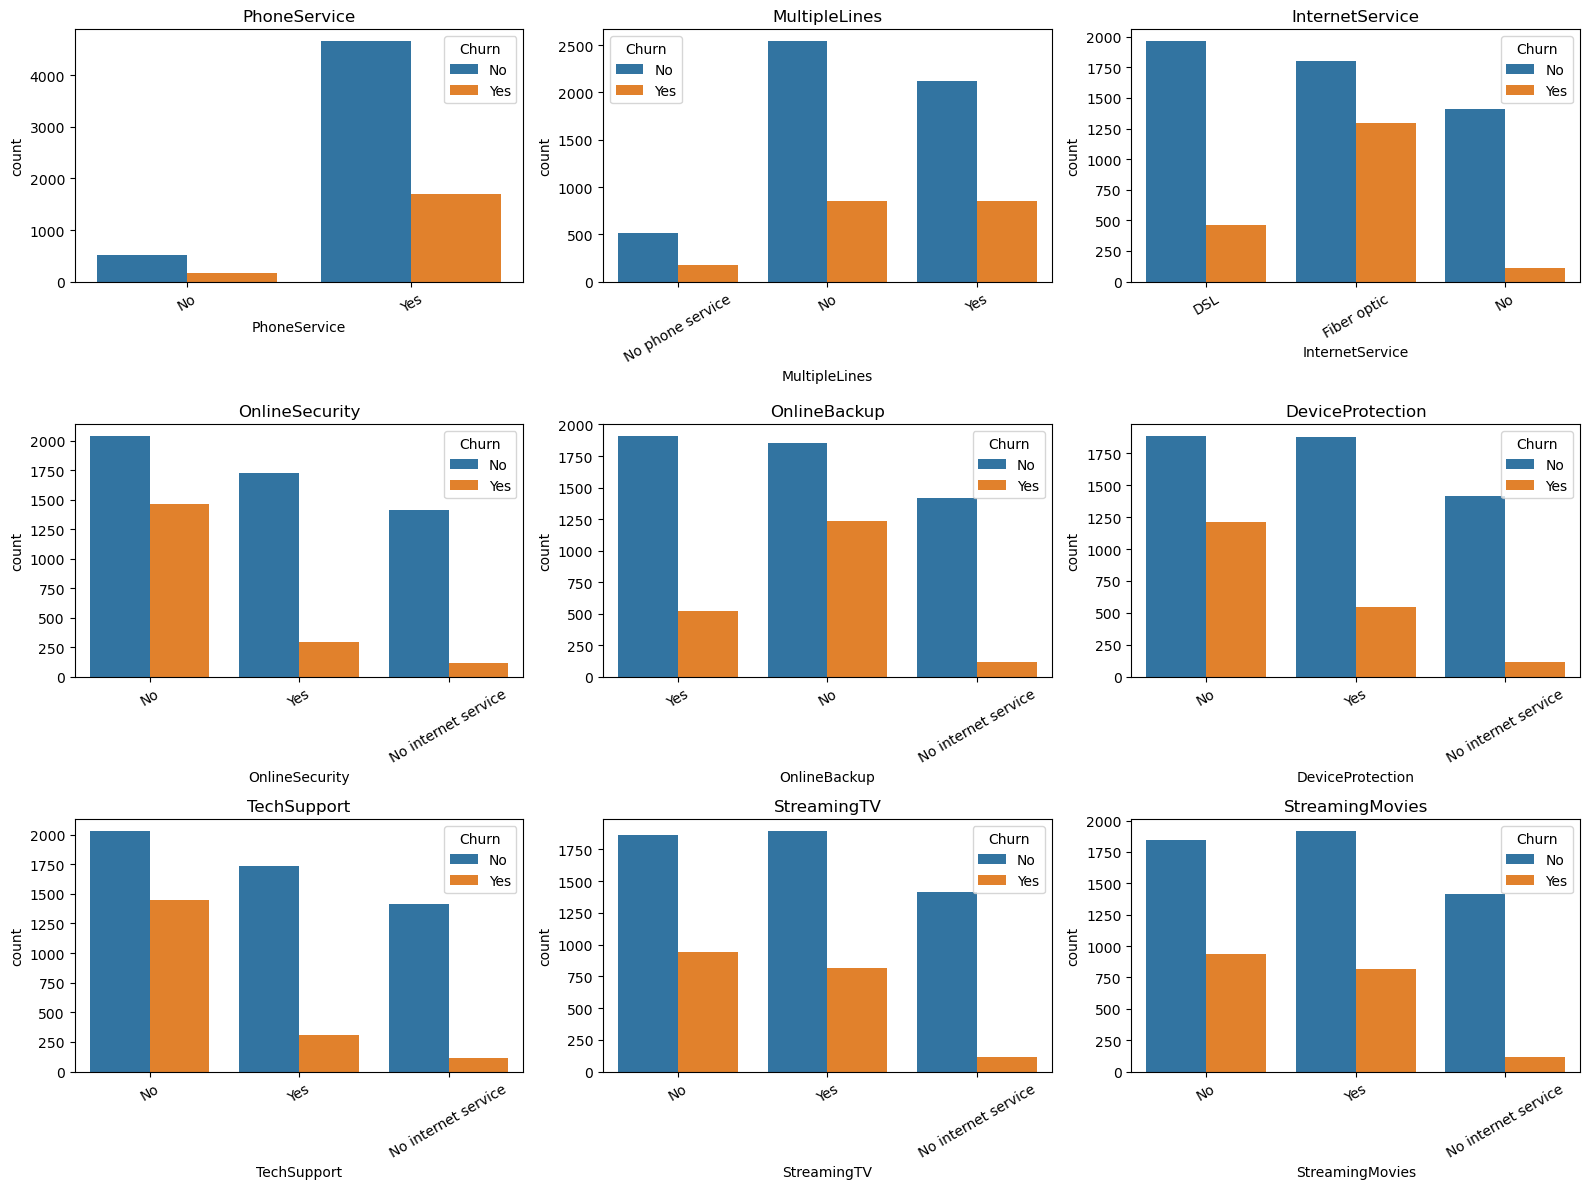

In [18]:


cols = [
    'PhoneService', 'MultipleLines', 'InternetService',
    'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
    'TechSupport', 'StreamingTV', 'StreamingMovies'
]

fig, axes = plt.subplots(3, 3, figsize=(16, 12))
axes = axes.flatten()

for i, col in enumerate(cols):
    sns.countplot(
        x=col,
        data=df,
        hue="Churn",
        ax=axes[i]
    )
    axes[i].set_title(col)
    axes[i].tick_params(axis='x', rotation=30)

plt.tight_layout()
plt.show()



Across all service-related features, **customers without value-added services** (OnlineSecurity, TechSupport, OnlineBackup, DeviceProtection) show **significantly higher churn** compared to those who have them. **Fiber optic internet users** exhibit a notably higher churn count than DSL users, indicating possible price or service-quality sensitivity. Customers with **“No internet service”** consistently have the **lowest churn**, suggesting stability among basic or non-internet users. Overall, churn is strongly associated with **lack of bundled or support services rather than core connectivity alone**.

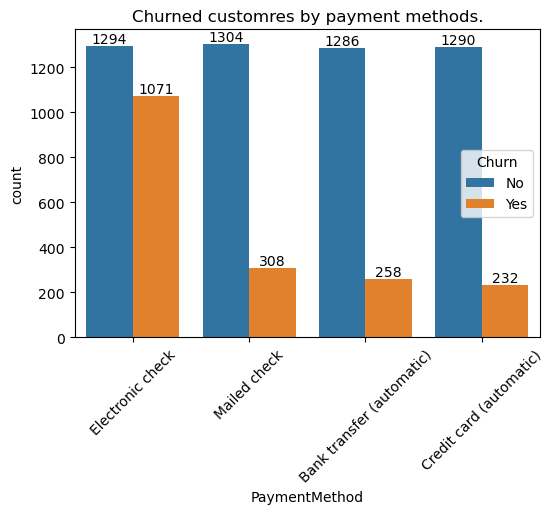

In [25]:
plt.figure(figsize = (6,4))
sc = sns.countplot(x="PaymentMethod",data=df, hue="Churn")
sc.bar_label(sc.containers[0])
sc.bar_label(sc.containers[1])
plt.title("Churned customres by payment methods.")
plt.xticks(rotation=45)
plt.show()